# Challenge - 1985 WARD'S Automotive Yearbook

<ol><b>
<li>Business Problem</li>
<li>Data Cleaning</li>
<li>EDA</li>
<li>Prepare for ML</li>
<li>Conclusions</li>
</b></ol>

## Business Problem



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Data Cleaning

In [6]:
# cols names
cols = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

df = pd.read_csv('imports-85.data', header=None)
df.columns = cols
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [8]:
df = df.replace('?', np.nan)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [12]:
# num-of-cylinders and num-of-doors seams important to be in a numeric value
print('num-of-cylinders:\n',df['num-of-cylinders'].value_counts(), '\n')
print('num-of-doors:\n',df['num-of-doors'].value_counts())

num-of-cylinders:
 four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64 

num-of-doors:
 four    114
two      89
Name: num-of-doors, dtype: int64


In [14]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [16]:
# remove rows without price (price is our label)
df = df[df['price'].notna()]

# convert num-of-cylinders and num-of-doors to numeric values
replace_map_doors = { 'two': 2, 'four': 4}
df['num-of-doors'] = df['num-of-doors'].replace(replace_map_doors).astype(float)

replace_map_ncylinders = { 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['num-of-cylinders'] = df['num-of-cylinders'].replace(replace_map_ncylinders).astype(int)

# convert the rest columns to floats (int was not working :/)
obj_to_int = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df[obj_to_int] = df[obj_to_int].astype(float)

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [ ]:
df['make'].unique()

## EDA

In [10]:
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,199.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,3.135678,98.797015,174.200995,65.889055,53.766667,2555.666667,4.363184,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,0.993252,6.066366,12.322175,2.101471,2.447822,517.296727,1.059452,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,2.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,4.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,4.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,4.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


### Explore categorical values

<AxesSubplot:xlabel='make', ylabel='price'>

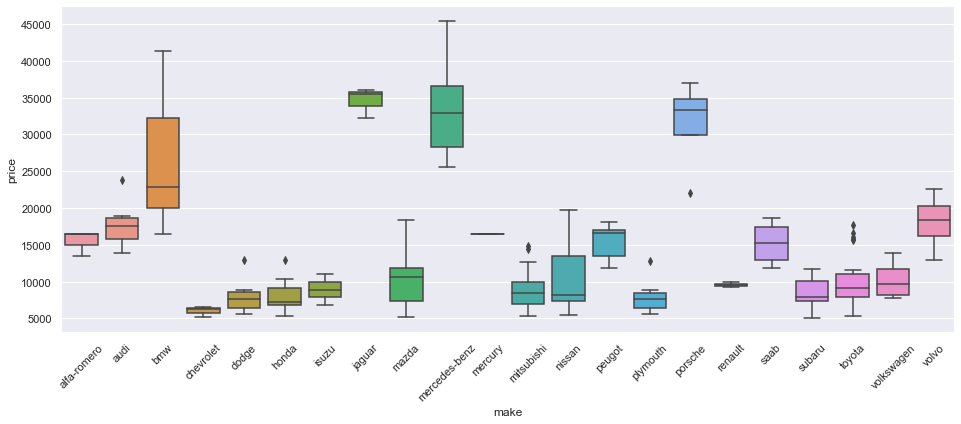

In [11]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(x='make', y='price', data=df)

<AxesSubplot:xlabel='fuel-type', ylabel='price'>

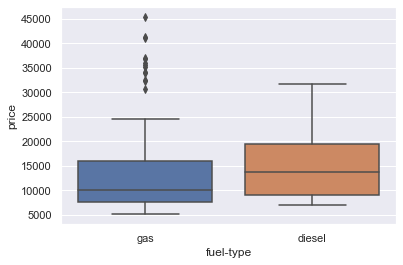

In [12]:
sns.boxplot(x='fuel-type', y='price', data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

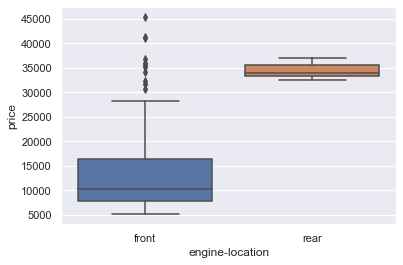

In [13]:
sns.boxplot(x='engine-location', y='price', data=df)

<AxesSubplot:xlabel='make', ylabel='price'>

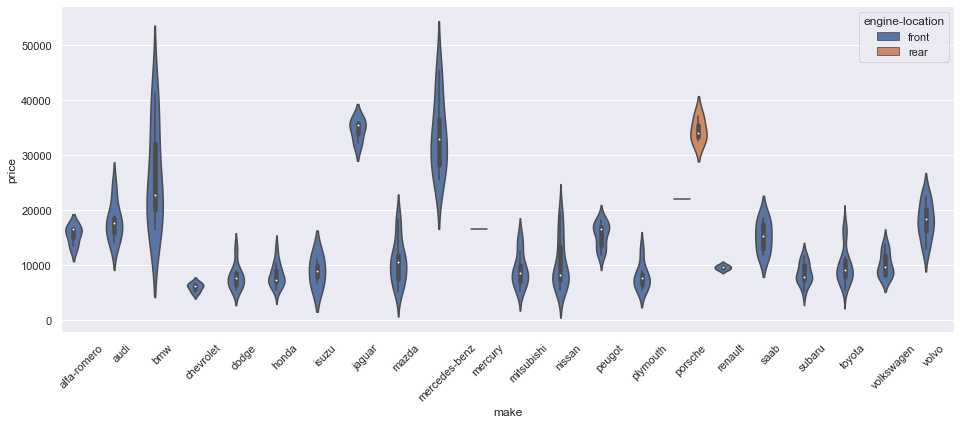

In [14]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.violinplot(x='make', y='price', hue='engine-location', data=df)

only porsche has rear engine

<AxesSubplot:xlabel='aspiration', ylabel='price'>

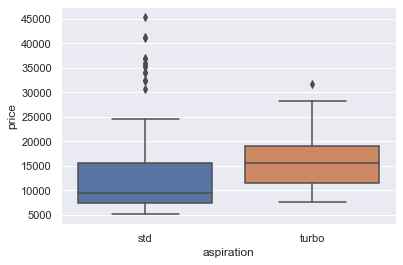

In [15]:
sns.boxplot(x='aspiration', y='price', data=df)

### Explore Numerical Values

<AxesSubplot:xlabel='symboling', ylabel='price'>

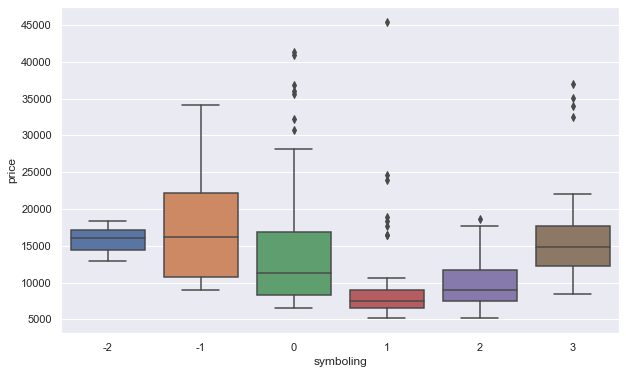

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='symboling', y='price', data=df)

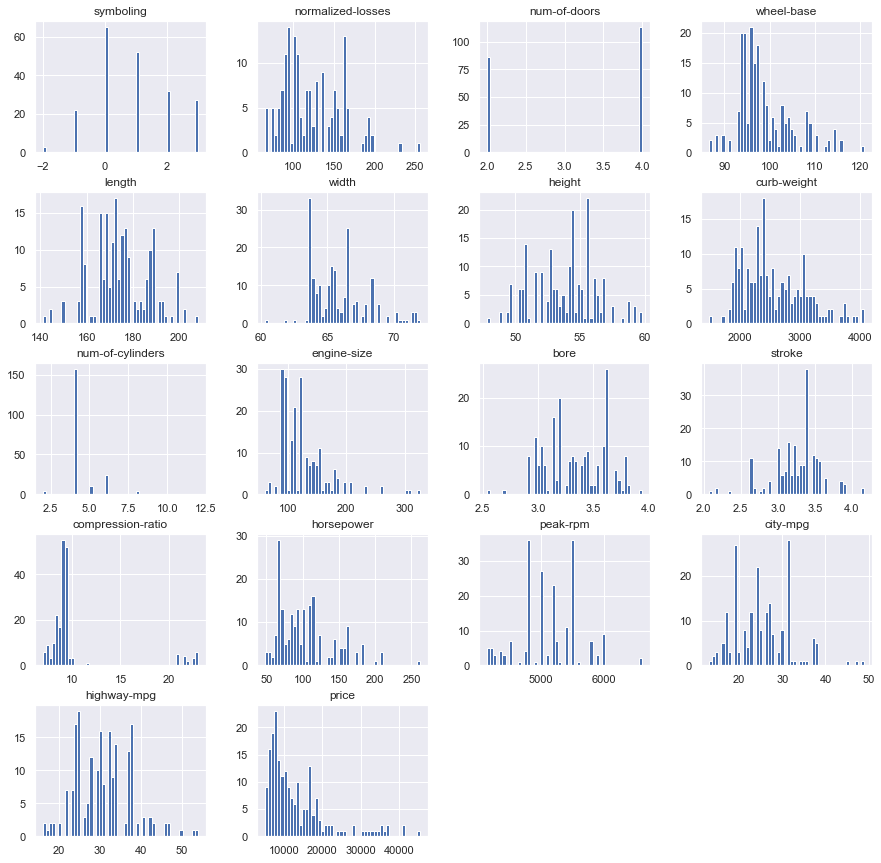

In [17]:
# plot a histogram from each numeric column
df.hist(bins=50, figsize=(15,15))
plt.show()

In [18]:
# to build streamlit app
print(df['engine-size'].min())
print(df['engine-size'].max())

print(df['horsepower'].min())
print(df['horsepower'].max())

61
326
48.0
262.0


In [19]:
# see the correlation from our dataset
corr_matrix = df.corr()

corr_matrix['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.810533
width                0.751265
num-of-cylinders     0.708645
length               0.690628
wheel-base           0.584642
bore                 0.543436
normalized-losses    0.203254
height               0.135486
stroke               0.082310
compression-ratio    0.071107
num-of-doors         0.046532
symboling           -0.082391
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

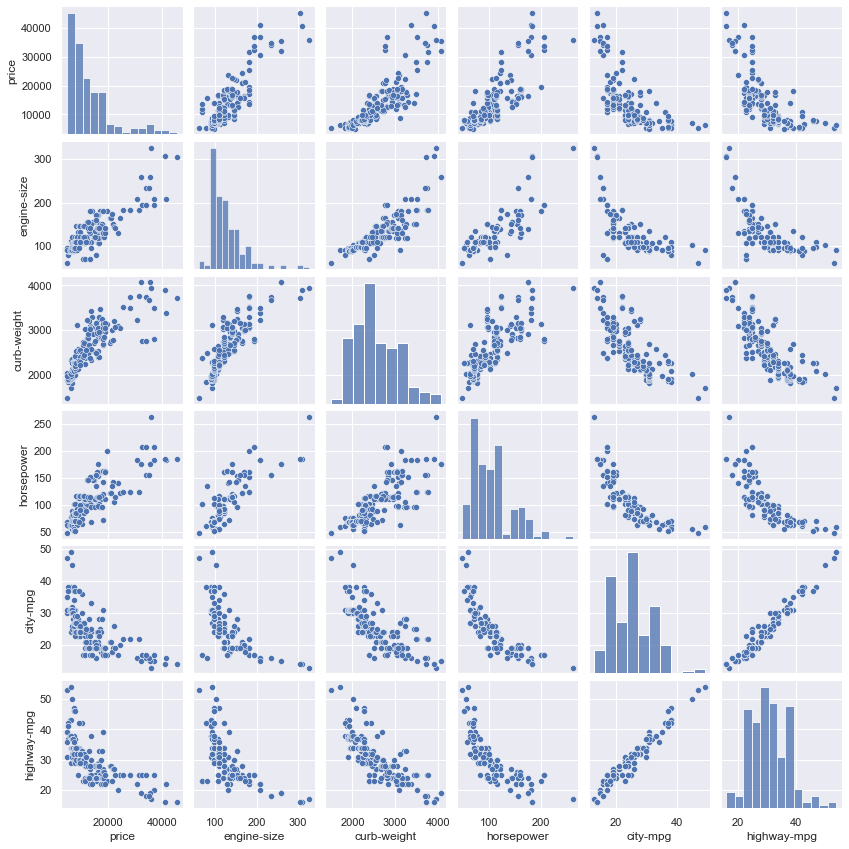

In [20]:
# correlations
num_features = ['price', 'engine-size', 'curb-weight', 'horsepower', 'city-mpg', 'highway-mpg']
sns.pairplot(df[num_features], height = 2.0)
plt.show()

## Prepare for ML

In [19]:
# split data
from sklearn.model_selection import train_test_split

ml = df.copy()

train_set, test_set = train_test_split(ml, test_size=0.4, random_state=2)

# separate the features and the label
best_features = ['engine-size', 'horsepower']

X_train = train_set[best_features]
X_train = train_set.drop('price', axis=1)

y_train = train_set['price'].copy()

### Impute median

In [21]:
# impute median value to the dataset
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train_num = X_train[best_features]

imputer.fit(X_train_num)
imputer.statistics_

array([110.,  90.])

### Categorical values

In [22]:
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ['make', 'aspiration']

X_train_cat = X_train[cat_attribs]

make_cat = ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']

asp_cat = ['std', 'turbo']

cat_encoder = OneHotEncoder()


# see the matrix
X_train_cat_encoded = cat_encoder.fit_transform(X_train_cat)
print(X_train_cat_encoded)

cat_encoder.categories_

  (0, 19)	1.0
  (0, 22)	1.0
  (1, 20)	1.0
  (1, 22)	1.0
  (2, 12)	1.0
  (2, 22)	1.0
  (3, 5)	1.0
  (3, 22)	1.0
  (4, 19)	1.0
  (4, 22)	1.0
  (5, 19)	1.0
  (5, 22)	1.0
  (6, 8)	1.0
  (6, 22)	1.0
  (7, 0)	1.0
  (7, 22)	1.0
  (8, 4)	1.0
  (8, 22)	1.0
  (9, 19)	1.0
  (9, 22)	1.0
  (10, 14)	1.0
  (10, 22)	1.0
  (11, 19)	1.0
  (11, 22)	1.0
  (12, 4)	1.0
  :	:
  (107, 22)	1.0
  (108, 21)	1.0
  (108, 23)	1.0
  (109, 12)	1.0
  (109, 22)	1.0
  (110, 19)	1.0
  (110, 22)	1.0
  (111, 19)	1.0
  (111, 22)	1.0
  (112, 1)	1.0
  (112, 22)	1.0
  (113, 13)	1.0
  (113, 22)	1.0
  (114, 11)	1.0
  (114, 22)	1.0
  (115, 6)	1.0
  (115, 22)	1.0
  (116, 4)	1.0
  (116, 23)	1.0
  (117, 10)	1.0
  (117, 23)	1.0
  (118, 2)	1.0
  (118, 22)	1.0
  (119, 19)	1.0
  (119, 22)	1.0


[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 array(['std', 'turbo'], dtype=object)]

### Pipeline and Feature Scaling

In [23]:
# numeric pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])

X_train_num_tr = num_pipeline.fit_transform(X_train_num)

In [24]:
# cat pipeline and full_pipeline

from sklearn.compose import ColumnTransformer

num_attribs = list(X_train_num)
# cat_attribs

full_pipeline = ColumnTransformer([('cat', cat_encoder, cat_attribs), ('num', num_pipeline, num_attribs)])
X_train_prepared = full_pipeline.fit_transform(X_train)

### Select and train a model

In [25]:
# LinearRegression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1640.082037460219

In [26]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_prepared, y_train)

y_predictions = forest_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1305.6305852964135

### Grid Search CV with RandomForestRegressor

In [27]:
from sklearn.model_selection import GridSearchCV

# dict to give different values to the arguments
param_grid = [
              {'n_estimators': [80, 100, 120, 140],
              'bootstrap': [False, True],
              'max_depth': [None, 5, 10, 15]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=2, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

# see the values for eache param
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

2936.853998117009 {'bootstrap': False, 'max_depth': None, 'n_estimators': 80}
2938.335131582184 {'bootstrap': False, 'max_depth': None, 'n_estimators': 100}
2938.9823038574777 {'bootstrap': False, 'max_depth': None, 'n_estimators': 120}
2940.7504199830055 {'bootstrap': False, 'max_depth': None, 'n_estimators': 140}
2933.816282696236 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 80}
2935.0968885176867 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 100}
2935.5286082738567 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 120}
2934.964494758558 {'bootstrap': False, 'max_depth': 5, 'n_estimators': 140}
2924.9268285252115 {'bootstrap': False, 'max_depth': 10, 'n_estimators': 80}
2926.365362892512 {'bootstrap': False, 'max_depth': 10, 'n_estimators': 100}
2927.5159804843834 {'bootstrap': False, 'max_depth': 10, 'n_estimators': 120}
2928.8684905445753 {'bootstrap': False, 'max_depth': 10, 'n_estimators': 140}
2937.1812481806905 {'bootstrap': False, 'max_depth': 15, 'n_estimato

In [28]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=15, n_estimators=140)

### Final Model - test data

In [29]:
# final model equals to the best settings from GSCV
final_model = grid_search.best_estimator_

# separate X and y from our test set
X_test = test_set[best_features]
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

# full pipeline on X_test
X_test_prepared = full_pipeline.transform(X_test)

# predict and final rmse
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3057.319762992952

Feature: 0, Score: 0.00047
Feature: 1, Score: 0.00220
Feature: 2, Score: 0.00198
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00026
Feature: 5, Score: 0.00049
Feature: 6, Score: 0.00009
Feature: 7, Score: 0.00016
Feature: 8, Score: 0.00167
Feature: 9, Score: 0.00021
Feature: 10, Score: 0.00020
Feature: 11, Score: 0.00129
Feature: 12, Score: 0.00063
Feature: 13, Score: 0.00424
Feature: 14, Score: 0.00074
Feature: 15, Score: 0.00025
Feature: 16, Score: 0.00071
Feature: 17, Score: 0.00058
Feature: 18, Score: 0.00015
Feature: 19, Score: 0.00519
Feature: 20, Score: 0.00077
Feature: 21, Score: 0.00471
Feature: 22, Score: 0.00171
Feature: 23, Score: 0.00158
Feature: 24, Score: 0.88340
Feature: 25, Score: 0.08629


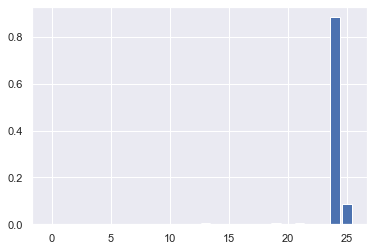

In [30]:
importance = final_model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Confidence Intervals

In [31]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([2361.34360698, 3621.94210834])

### Save Model

In [33]:
import pickle

data = {"model": final_model, "pipe": full_pipeline, 'cat_enconder': cat_encoder}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)